In [127]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## Preparing data

In [128]:
df = pd.DataFrame.from_csv('2011.csv')
df.columns = df.columns.str.strip()
df['Total'] = pd.Series(
    df['Chinese'] + 
    df['South Asian'] + 
    df['Black'] +
    df['Filipino'] +
    df['Latin American'] +
    df['Southeast Asian'] +
    df['Arab'] +
    df['West Asian'] +
    df['Korean'] +
    df['White'], index=df.index)

ethnicities = [
    'Chinese',
    'South Asian',
    'Black',
    'Filipino',
    'Latin American',
    'Southeast Asian',
    'Arab',
    'West Asian',
    'Korean',
    'White'
]
    
crimes = [
    'Drug Arrests', 
    'Assaults',
    'Sexual Assaults', 
    'Break & Enters', 
    'Robberies', 
    'Vehicle Thefts',
    'Thefts'
]

In [129]:
print(df['White'].sum()/df['Total'].sum())
print(df['South Asian'].sum()/df['Total'].sum())
print(df['Chinese'].sum()/df['Total'].sum())
print(df['Black'].sum()/df['Total'].sum())
print(df['Filipino'].sum()/df['Total'].sum())
print(df['Latin American'].sum()/df['Total'].sum())
print(df['Southeast Asian'].sum()/df['Total'].sum())
print(df['Arab'].sum()/df['Total'].sum())
print(df['West Asian'].sum()/df['Total'].sum())

0.52 + 0.12 + 0.11 + 0.08

0.5263907728611675
0.1272544125083274
0.11172133976514781
0.08753782436651711
0.05315276629557986
0.028553885174453602
0.018797807190040854
0.011558002712920082
0.020124168265256162


0.83

In [130]:
#custom scatter plot ethnicity vs variouse crimes
def plot(df,ethnicity,crimes):
    
    fig, axs = plt.subplots(1,len(crimes),figsize=(16,16))
    for i in range(0,len(crimes)):
        axs[i].scatter(df[crimes[i]], df[ethnicity])
        axs[i].set_ylim(bottom=0)
        axs[i].set_xlim(left=0)
        axs[i].set_aspect(np.diff(axs[i].get_xlim())[0] / np.diff(axs[i].get_ylim())[0])
        axs[i].get_xaxis().set_visible(False)
        axs[i].get_yaxis().set_visible(False)
        axs[i].set_title(crimes[i], fontsize=14)
 
    axs[0].get_yaxis().set_visible(True)
    axs[0].set_yticklabels([])
    axs[0].set_xticklabels([])
    axs[0].set_ylabel(ethnicity, fontsize=14)
    
    plt.subplots_adjust(wspace=0,top=None,bottom=None)
    plt.show() 

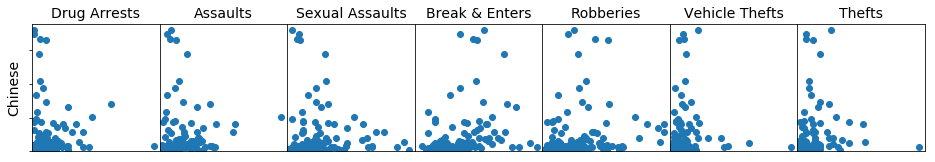

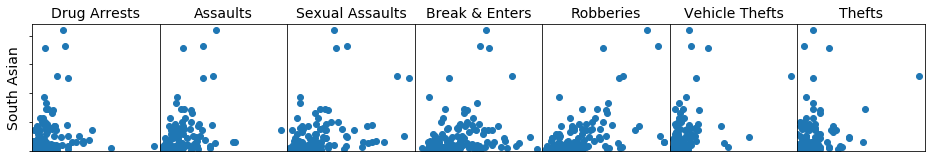

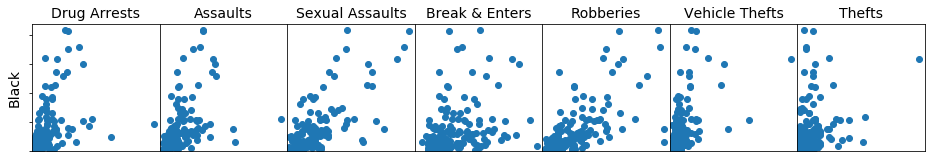

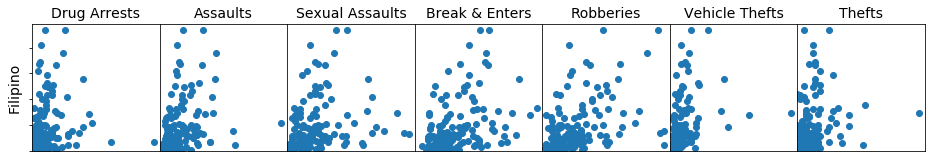

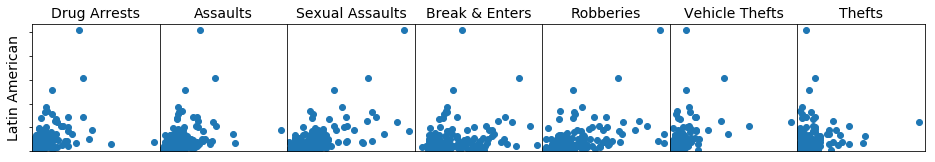

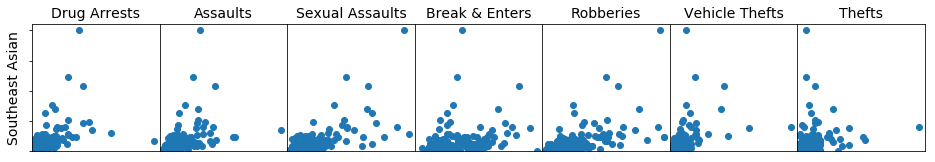

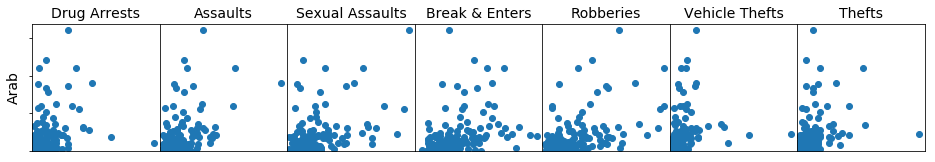

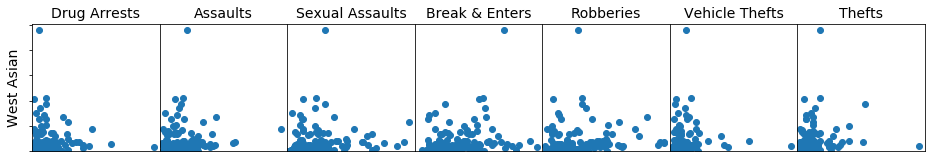

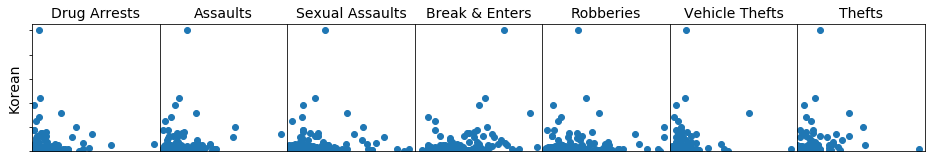

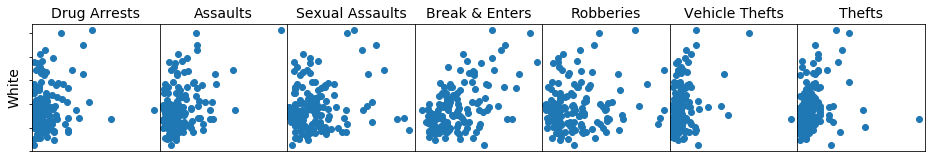

In [131]:
for ethnicity in ethnicities:
    plot(df, ethnicity, crimes)

In [132]:
#running linnear regression and collecting results
df['Const'] = 1
res = pd.DataFrame(data = [], columns=ethnicities + ['Crime'])
for crime in crimes:
    model = sm.OLS(df[crime], df[['Const'] + ethnicities])
    results = model.fit()
    series = results.params[ethnicities]
    series['Crime'] = crime
    res = res.append(series, ignore_index = True)

In [133]:
res = res.set_index('Crime')

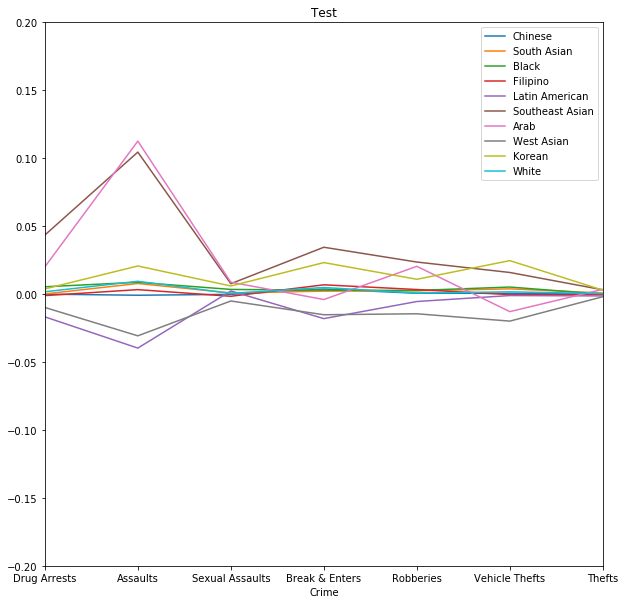

In [134]:
#plotting coefficients of linear models
chart = res.plot(figsize=(10,10))
chart.set_ylim(bottom=-0.2)
chart.set_ylim(top=0.2)
chart.set_title('Test')
plt.show()

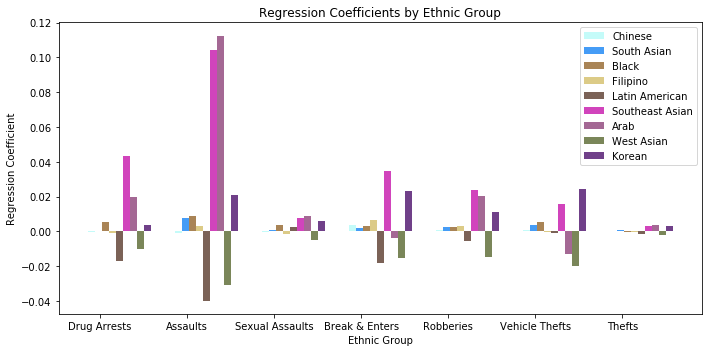

In [135]:
data = [
    tuple(res[ethnicities[0]].values),
    tuple(res[ethnicities[1]].values),
    tuple(res[ethnicities[2]].values),
    tuple(res[ethnicities[3]].values),
    tuple(res[ethnicities[4]].values),
    tuple(res[ethnicities[5]].values),
    tuple(res[ethnicities[6]].values),
    tuple(res[ethnicities[7]].values),
    tuple(res[ethnicities[8]].values),
]

colors = ['#b6faf8','#1683f4','#94652c','#d4be69','#5a3b2d','#c615ac','#8d4279','#596830','#4c106c']

 
# create plot
fig, ax = plt.subplots(figsize=(10,5))
index = np.arange(len(crimes))
width = 0.08
opacity = 0.8
 
    
for i in np.arange(0,len(data)):
    plt.bar(index + width * i, data[i], width, alpha=opacity, color=colors[i], label=ethnicities[i])
 
plt.xlabel('Ethnic Group')
plt.ylabel('Regression Coefficient')
plt.title('Regression Coefficients by Ethnic Group')
plt.xticks(index + bar_width, tuple(crimes))
plt.legend()
 
plt.tight_layout()
plt.show()

In [25]:
#coefficients of linear models
res

,Chinese,South Asian,Black,Latin American,Southeast Asian,Arab,West Asian,Korean,White
Crime,,,,,,,,,
Drug Arrests,-0.000124,-0.000103,0.005142,-0.016974,0.043772,0.020494,-0.010000,0.003666,0.001617
Assaults,-0.000859,0.008184,0.009075,-0.039331,0.103282,0.110948,-0.030493,0.020814,0.009464
Sexual Assaults,-0.000294,0.000527,0.003124,0.001990,0.008164,0.009500,-0.005285,0.005790,0.000383
Break & Enters,0.003764,0.003072,0.003805,-0.017139,0.032011,-0.007316,-0.014659,0.023536,0.005014
Robberies,0.000602,0.002830,0.003079,-0.005050,0.022352,0.018787,-0.014256,0.011032,0.000820
Vehicle Thefts,0.000488,0.003728,0.005057,-0.001208,0.015994,-0.012751,-0.019997,0.024538,0.001561
Thefts,-0.000018,0.000697,-0.000232,-0.001438,0.003156,0.003549,-0.002023,0.002791,0.000315
